In [1]:
import json
import numpy as np
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data_path = 'activity_net.v1-3.min.json'
vid = json.load(open(data_path))
#print(vid.keys())
#print(vid['version'], vid['taxonomy'])
vid = vid['database']
#print(vid.keys())
print(vid['ZSdnDVGXU3k'])
#for i in range(100):
#    print(vid[vid.keys()[i]])

{u'duration': 88.68, u'subset': u'testing', u'resolution': u'960x720', u'url': u'https://www.youtube.com/watch?v=ZSdnDVGXU3k', u'annotations': []}


In [5]:
def print_stats(splits=[], return_args=False):
    durations = []
    nb_prop = []
    prop_durations = []
    for i, vid_id in enumerate(vid.keys()):
        if len(splits)==0: 
            pass
        else:
            if vid[vid_id]['subset'] not in splits:
                continue
        durations.append(vid[vid_id]['duration'])
        nb_prop.append(len(vid[vid_id]['annotations']))
        for p in vid[vid_id]['annotations']:
            prop_durations.append(p['segment'][1]-p['segment'][0])
    nb_videos = len(durations)
    nb_prop = np.array(nb_prop)
    prop_durations = np.array(prop_durations)
    if len(splits)==0:
        print "Total number of videos: {}".format(nb_videos)
    else: 
        print "Total number of videos in split {}: {}".format(splits, nb_videos)
    print "{}% of videos have no proposals".format(100.*np.sum(nb_prop==0)/nb_videos)
    print "Average number of proposals per video (excluding videos with no proposals: {}".format(nb_prop[nb_prop!=0].mean())
    print "Average video duration: {}".format(np.mean(durations))
    print "Average proposal duration: {}".format(np.mean(prop_durations))
    if return_args: 
        return durations, nb_prop, prop_durations

In [6]:
# all splits 
print_stats()

Total number of videos: 19994
25.2275682705% of videos have no proposals
Average number of proposals per video (excluding videos with no proposals: 1.54274247492
Average video duration: 116.704419376
Average proposal duration: 49.2139085214


# length of video in Sec

In [7]:
durations, nb_prop, prop_durations = print_stats(return_args=True, splits=['training', 'validation'])

Total number of videos in split ['training', 'validation']: 14950
0.0% of videos have no proposals
Average number of proposals per video (excluding videos with no proposals: 1.54274247492
Average video duration: 117.651892308
Average proposal duration: 49.2139085214


In [8]:
print_stats(['testing'])

Total number of videos in split ['testing']: 5044
100.0% of videos have no proposals
Average number of proposals per video (excluding videos with no proposals: nan
Average video duration: 113.896187748
Average proposal duration: nan


/Users/zengxiaohui/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/zengxiaohui/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


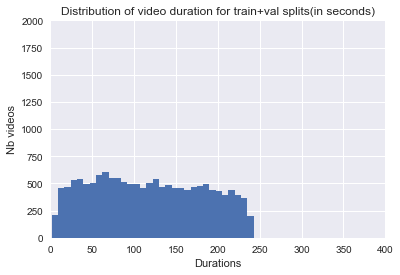

In [7]:
plt.hist(durations, bins=100)
plt.xlabel('Durations')
plt.ylabel('Nb videos')
plt.title('Distribution of video duration for train+val splits(in seconds)')
plt.axis([0, 400, 0, 2000])
plt.grid(True)

plt.savefig('duration.png')
plt.show()
# plt.save('duration.png')

### length of proposal in Sec

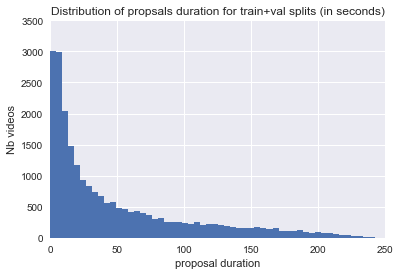

In [8]:
plt.hist(prop_durations, bins=100)
plt.xlabel('proposal duration')
plt.ylabel('Nb videos')
plt.title('Distribution of propsals duration for train+val splits (in seconds)')
plt.axis([0, 250, 0, 3500])
plt.grid(True)
plt.show()

In [9]:
def proportion_of_prop_captured(K, prop_durations, c3d_feats_length, iou_thresh=0.5):
    # approximation to see if proposal would be captured 
    
    max_length = K*c3d_feats_length
    return np.mean(iou_thresh*prop_durations<=max_length)

In [10]:
print "Computing proportion of proposals captured for different values of K"
for K in [16, 64, 128, 256, 512]:
    print "K = {} : {}".format(K, proportion_of_prop_captured(K, prop_durations, 0.33))

Computing proportion of proposals captured for different values of K
K = 16 : 0.296869580298
K = 64 : 0.611949358307
K = 128 : 0.786203607353
K = 256 : 0.951135969476
K = 512 : 0.999913284773


## CAPTION

In [11]:
data_path = 'captions/val_1.json'
vid = json.load(open(data_path))#['database']
print(vid['v_uqiMw7tQ1Cc'].keys())

[u'duration', u'timestamps', u'sentences']


In [12]:
def print_stats_caption(vid):
    nb_prop = []
    prop_durations = []
    durations = []
    print('lengh of data: ', len(vid.keys()))
    for i, vid_id in enumerate(vid.keys()):
        durations.append(vid[vid_id]['duration'])
        nb_prop.append(len(vid[vid_id]['timestamps']))
        for p in vid[vid_id]['timestamps']:
            prop_durations.append(p[1]-p[0])
    nb_videos = len(durations)
    nb_prop = np.array(nb_prop)
    prop_durations = np.array(prop_durations)
    print "Total number of videos: {}".format(nb_videos)
    #if len(splits)==0:
    #    print "Total number of videos: {}".format(nb_videos)
    #else: 
    #    print "Total number of videos in split {}: {}".format(splits, nb_videos)
    print "{}% of videos have no proposals".format(100.*np.sum(nb_prop==0)/nb_videos)
    print "Average number of proposals per video (excluding videos with no proposals: {}".format(nb_prop[nb_prop!=0].mean())
    print "Average video duration: {}".format(np.mean(durations))
    print "Average proposal duration: {}".format(np.mean(prop_durations))
    # if return_args: 
    # durations = []
    return durations, nb_prop, prop_durations

In [13]:
print('---------- data of captioning -----------')
data_path = 'captions/train.json'
captiondata = json.load(open(data_path))#['database']
durations, nb_prop, prop_durations = print_stats_caption(captiondata)
#print(captiondata['v_RpVkFIpEhIE'])
#print(captiondata.keys()[0])

---------- data of captioning -----------
('lengh of data: ', 10009)
Total number of videos: 10009
0.0% of videos have no proposals
Average number of proposals per video (excluding videos with no proposals: 3.73873513838
Average video duration: 117.297459287
Average proposal duration: 35.452850004


## Caption: length of video and proposal in Sec 

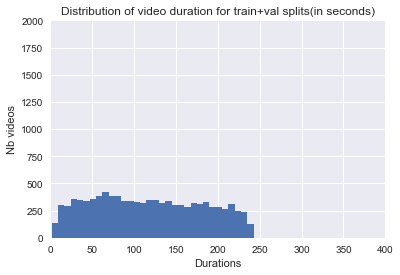

In [14]:
plt.hist(durations, bins=100)
plt.xlabel('Durations')
plt.ylabel('Nb videos')
plt.title('Distribution of video duration for train+val splits(in seconds)')
plt.axis([0, 400, 0, 2000])
plt.grid(True)
plt.show()

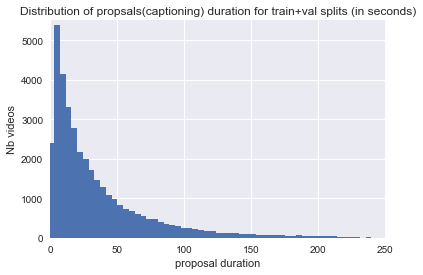

In [15]:
plt.hist(prop_durations, bins=100)
plt.xlabel('proposal duration')
plt.ylabel('Nb videos')
plt.title('Distribution of propsals(captioning) duration for train+val splits (in seconds)')
plt.axis([0, 250, 0, 5500])
plt.grid(True)
plt.savefig('length.png')
plt.show()

## (val set) relation between frames & duration - v1.2

In [16]:
import pandas as pd
ground_truth = pd.read_csv('activitynet_v1-2_val_groundtruth.csv', sep=' ')
print(ground_truth.keys())

Index([u'video-name', u't-init', u't-end', u'f-init', u'f-end',
       u'video-duration', u'frame-rate', u'video-frames', u'label-idx'],
      dtype='object')


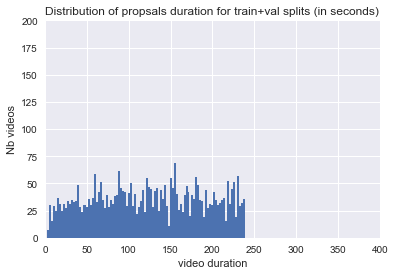

In [17]:
names = ground_truth['video-name']
duration = ground_truth['video-duration']
video_frames = ground_truth['video-frames']

plt.hist(duration, bins=100)
plt.xlabel('video duration')
plt.ylabel('Nb videos')
plt.title('Distribution of propsals duration for train+val splits (in seconds)')
plt.axis([0, 400, 0, 200])
plt.grid(True)
plt.show()

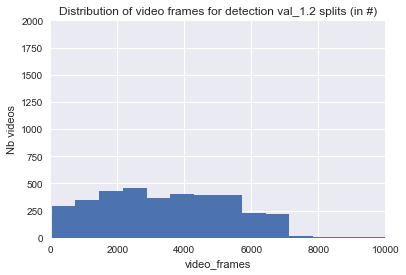

In [18]:
plt.hist(video_frames, bins=20)
plt.xlabel('video_frames')
plt.ylabel('Nb videos')
plt.title('Distribution of video frames for detection val_1.2 splits (in #)')
plt.axis([0, 10000, 0, 2000])
plt.grid(True)
plt.show()

# length of c3d features - depend of #frames/8

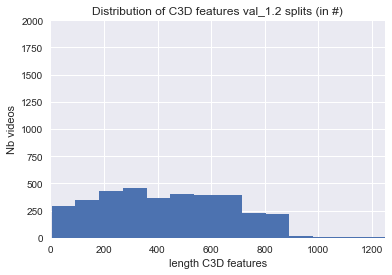

In [19]:
C3D_features = video_frames / 8.0
plt.hist(C3D_features, bins=20)
plt.xlabel('length C3D features')
plt.ylabel('Nb videos')
plt.title('Distribution of C3D features val_1.2 splits (in #)')
plt.axis([0, 10000/8, 0, 2000])
plt.grid(True)
plt.show()

In [20]:
print "Computing proportion of proposals captured for different values of K"
for K in [16, 64, 128, 256, 512]:
    print "K = {} : {}".format(K, proportion_of_prop_captured(K, C3D_features, 0.73))

Computing proportion of proposals captured for different values of K
K = 16 : 0.0100502512563
K = 64 : 0.0826353992183
K = 128 : 0.189279731993
K = 256 : 0.445002791736
K = 512 : 0.888051367951


## Load c3d feature:

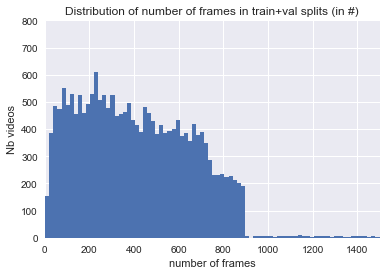

('mean:', 411.97684305291585)
counting: total length of c3d features for a video
K = 16 : 83
K = 64 : 1210
K = 128 : 3023
K = 256 : 6591
K = 512 : 13016
K = 500 : 12754
K = 1000 : 19780
K = 1024 : 19785
('mean value: ', 411.97684305291585)
10


In [30]:
## c3d feature are extracted every 8 frames, input 16 frames at a time for one fetaure
# number_c3d_feature = floor((num_frames - 8) / 8.0)
## ---------
## example:
##   num_frames = 5222 # number of frames of xBtydVn3MVI 
##   print('expected num c3d feature: ', (num_frames - 8) / 8.0)
##   print(c3d['v_xBtydVn3MVI'])
## ---------

c3d = json.load(open('c3d_feature_lens.json', 'r'))
C3D_features = []
for i in c3d.keys():
    C3D_features.append(float(c3d[i]))
#print(c3d['v_D3d3CkKm2b4'])
plt.hist(C3D_features, bins=200)
plt.xlabel('number of frames')
plt.ylabel('Nb videos')
plt.title('Distribution of number of frames in train+val splits (in #)')
plt.axis([0, 1500, 0, 800])
plt.grid(True)
plt.savefig('frames.png')
plt.show()

C3D_features = np.array(C3D_features)
print('mean:', np.mean(C3D_features))
print('counting: total length of c3d features for a video')
for K in [16, 64, 128, 256, 512, 500, 1000, 1024]:
    print "K = {} : {}".format(K, np.sum(C3D_features < K))
print('mean value: ', np.mean(C3D_features))
print(c3d['v_2UJ4wqJt_Y8'])

In [37]:
#128/16*8
100 / 8 * 4

48

## ---------- data of captioning (proposal) -----------

---------- data of captioning -----------
Q: how many c3d features in one proposal on average?


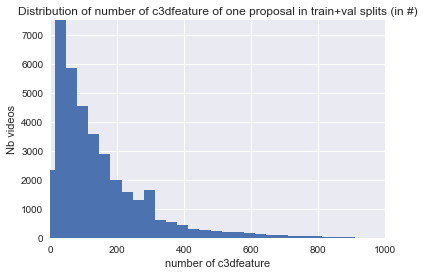

counting ratio:
('min!!, ', 0.0)
('max!!, ', 2827.0)
if window K = 10 then the ratio of proposal will be: 0.0404852890088
if window K = 20 then the ratio of proposal will be: 0.112182998851
if window K = 40 then the ratio of proposal will be: 0.241067849603
if window K = 60 then the ratio of proposal will be: 0.345821864728
if window K = 80 then the ratio of proposal will be: 0.432992170172
if window K = 100 then the ratio of proposal will be: 0.510221533364
if window K = 120 then the ratio of proposal will be: 0.576360866893
if window K = 140 then the ratio of proposal will be: 0.633147163357
if window K = 160 then the ratio of proposal will be: 0.684214745731
if window K = 240 then the ratio of proposal will be: 0.81710804094
if window K = 360 then the ratio of proposal will be: 0.926511851634


In [56]:
print('---------- data of captioning -----------')
data_path = 'captions/train.json'
c3d = json.load(open('c3d_feature_lens.json', 'r'))

captiondata = json.load(open(data_path))#['database']
# print(captiondata.keys())
print('Q: how many c3d features in one proposal on average?')
num_c3dfeature = []
num_c3dfeature_end = []
for vid in captiondata.keys():
    v = captiondata[vid]
    for t in v['timestamps']:
        # start frames index and end frames index
        start = t[0] / v['duration']
        end = t[1] / v['duration']
        
        total_c3dfeature = c3d[vid]
        total_c3dfeature = max(total_c3dfeature, 300)
        # num_c3dfeature.append(((end - start)))
        # num_c3dfeature.append(end - start)
        num_c3dfeature.append((end - start) * total_c3dfeature)
        #if num_c3dfeature[-1] < 2:
        #    print('small!', v['timestamps'], end - start)
        num_c3dfeature_end.append(end * total_c3dfeature)
#print(c3d['v_D3d3CkKm2b4'])
plt.hist(num_c3dfeature, bins=50)
plt.xlabel('number of c3dfeature')
plt.ylabel('Nb videos')
plt.title('Distribution of number of c3dfeature of one proposal in train+val splits (in #)')
plt.axis([0, 1000, 0, 7500])
plt.grid(True)
# plt.savefig('frames.png')
plt.show()


print('counting ratio:')

num_c3dfeature = np.array(num_c3dfeature)
num_c3dfeature = np.abs(num_c3dfeature)
num_c3dfeature_end = np.array(num_c3dfeature_end)
print('min!!, ', num_c3dfeature.min())
print('max!!, ', num_c3dfeature_end.max())
for K in [10, 20, 40, 60, 80, 100, 120, 140, 160, 240, 360]: 
#for K in [1/4.0, 1/8.0, 1/16.0, 1/32.0]:
    print "if window K = {} then the ratio of proposal will be: {}".format(K, np.mean(num_c3dfeature < K))

In [23]:
16.0 *16.0
print(np.mean(num_c3dfeature))

124.673151439


## displaying label and video

In [41]:
from IPython.display import HTML
def printinfo(val_data, name):
    print('duration %f'%(val_data[name]['duration']))
     #, val_data[name]['timestamps'])
    for i, sent in enumerate(val_data[name]['sentences']):
        print('sent {0}:\n {1} \n'.format(val_data[name]['timestamps'][i], sent))
    print(' ------------ ')    
train_data = 'captions/train.json'
val_data = 'captions/val_1.json'
val_data2 = 'captions/val_2.json'
train_data = json.load(open(train_data))
val_data = json.load(open(val_data))
val_data2 = json.load(open(val_data2))

name = 'ZSdnDVGXU3k'

data_path = 'activity_net.v1-3.min.json'
vid = json.load(open(data_path))['database']
#print(vid.keys())
name = vid.keys()[13]
print('Action GT:')
url = 'src=\"' + vid[name]['url'] + '?rel=0&amp;controls=1&amp;showinfo=0\"'
print('name', name )
print(vid[name]['annotations'][0]['label'], vid[name]['annotations'][0]['segment'])

subset = vid[name]['subset']
name = 'v_' + name
print('\nCap GT:')
if(subset == 'testing'):
    print('test data')
elif(subset == 'training'):
    print('training: ')
    printinfo(train_data, name)
else:
    print('val1: ')
    printinfo(val_data, name)
    print('val2: ')
    printinfo(val_data2, name)
    # print('val2: ', val_data2[name]['timestamps'], val_data2[name]['sentences'])
#print('<iframe width="560" height="315" %s frameborder="0" allowfullscreen></iframe>'%url)
HTML('<iframe width="560" height="315" %s frameborder="0" allowfullscreen></iframe>'%url.replace('watch?v=', 'embed/'))
#print('<iframe width="560" height="315" %s frameborder="0" allowfullscreen></iframe>'%url.replace('watch?v=', 'embed/'))
#HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/c_NlYvL96y0?rel=0&amp;controls=1&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

# HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/%s?rel=0&amp;controls=1&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>'%name)


#HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/JDg--pjY5gg?rel=0&amp;controls=1&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')
#HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/S_f2qV2_U00?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')
#https://www.youtube.com/watch?v=S_f2qV2_U00
#HTML('<iframe width="560" height="315" src="https://www.youtube.com/watch?v=JDg--pjY5gg" frameborder="0" allowfullscreen></iframe>')

Action GT:
('name', u'_uOfIm1tFcI')
(u'Tumbling', [6.459276987519502, 124.18480917940718])

Cap GT:
val1: 
duration 133.560000
sent [0, 38.07]:
 An intro leads into several shots of various men performing martial arts flips. 

sent [38.07, 133.56]:
  The video leads into boys doing flips onto trampolines as well as large bans to catch their fall. 

 ------------ 
val2: 
duration 133.560000
sent [0.67, 130.22]:
 A boy is seen tumbling backwards and forwards in different locations and on different surfaces including grass, bounce tarps and mattresses. 

sent [0.67, 43.41]:
   A boy is seen tumbling back and forward on grass lawns in different locations. 

sent [43.41, 55.43]:
   The boy is then seen doing similar gymnastic moves on a mattress outdoors. 

sent [56.1, 125.55]:
  The boy is then seen flipping on bounce tarps outdoors before returning to flipping on grass. 

 ------------ 


In [25]:
a = np.load('/Users/zengxiaohui/Downloads/black_box/plot/plot_c2_100/loss1_physical_c2untarget_loss.npy')

In [26]:
a.shape

(100, 500)

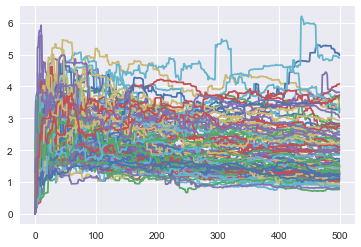

In [27]:
for i in range(100):
    plt.plot(a[i])
plt.show()
